In [1]:
import pandas as pd

df = pd.read_csv('usagers-2022.csv', sep=";")

In [2]:
df

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202200000001,1 099 700,813 952,A01,1,1,3,1,2008.0,5,2,8,-1,-1,-1,-1
1,202200000001,1 099 701,813 953,B01,1,1,1,1,1948.0,5,1,8,-1,-1,-1,-1
2,202200000002,1 099 698,813 950,B01,1,1,4,1,1988.0,9,1,0,-1,0,0,-1
3,202200000002,1 099 699,813 951,A01,1,1,1,1,1970.0,4,1,0,-1,0,0,-1
4,202200000003,1 099 696,813 948,A01,1,1,1,1,2002.0,0,1,0,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126657,202200055301,968 230,715 631,A01,1,1,1,2,2002.0,5,1,-1,-1,0,0,-1
126658,202200055301,968 231,715 631,A01,8,2,3,2,2004.0,5,1,-1,-1,0,0,-1
126659,202200055301,968 232,715 632,B01,1,1,4,2,1953.0,5,1,-1,-1,0,0,-1
126660,202200055302,968 228,715 629,A01,1,1,3,1,1992.0,1,2,6,-1,-1,-1,-1


In [3]:
df.head(5)

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202200000001,1 099 700,813 952,A01,1,1,3,1,2008.0,5,2,8,-1,-1,-1,-1
1,202200000001,1 099 701,813 953,B01,1,1,1,1,1948.0,5,1,8,-1,-1,-1,-1
2,202200000002,1 099 698,813 950,B01,1,1,4,1,1988.0,9,1,0,-1,0,0,-1
3,202200000002,1 099 699,813 951,A01,1,1,1,1,1970.0,4,1,0,-1,0,0,-1
4,202200000003,1 099 696,813 948,A01,1,1,1,1,2002.0,0,1,0,-1,-1,-1,-1


In [4]:
df.describe()

,Num_Acc,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,etatp
count,1.266620e+05,126662.000000,126662.000000,126662.000000,126662.000000,123788.000000,126662.000000,126662.000000,126662.000000,126662.000000,126662.000000,126662.000000
mean,2.022000e+11,2.089277,1.330067,2.512143,1.265549,1983.432756,3.174749,1.847586,0.844665,-0.916352,-0.158801,-0.829815
std,1.593056e+04,2.583156,0.610060,1.381566,0.570105,18.989238,2.780135,2.283796,2.957905,0.883369,1.204472,0.615546
min,2.022000e+11,-1.000000,1.000000,-1.000000,-1.000000,1913.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.022000e+11,1.000000,1.000000,1.000000,1.000000,1970.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.022000e+11,1.000000,1.000000,3.000000,1.000000,1987.000000,4.000000,1.000000,0.000000,-1.000000,0.000000,-1.000000
75%,2.022000e+11,2.000000,2.000000,4.000000,2.000000,1999.000000,5.000000,2.000000,0.000000,-1.000000,0.000000,-1.000000
max,2.022001e+11,10.000000,3.000000,4.000000,2.000000,2022.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000


In [5]:
!pip install pyspark

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit

sparkApp = SparkSession.builder.appName('MyApp').getOrCreate()

In [7]:
sparkApp

In [8]:
df_spark = sparkApp.read.csv('usagers-2022.csv', sep=";", inferSchema=True, header=True)
df_spark

DataFrame[Num_Acc: bigint, id_usager: string, id_vehicule: string, num_veh: string, place: double, catu: int, grav: double, sexe: double, an_nais: int, trajet: double, secu1: double, secu2: double, secu3: double, locp: double, actp: string, etatp: double]

In [9]:
type(df_spark)

pyspark.sql.dataframe.DataFrame

In [10]:
df_spark.show()

+------------+---------+-----------+-------+-----+----+----+----+-------+------+-----+-----+-----+----+----+-----+
|     Num_Acc|id_usager|id_vehicule|num_veh|place|catu|grav|sexe|an_nais|trajet|secu1|secu2|secu3|locp|actp|etatp|
+------------+---------+-----------+-------+-----+----+----+----+-------+------+-----+-----+-----+----+----+-----+
|202200000001|1 099 700|    813 952|    A01|  1.0|   1| 3.0| 1.0|   2008|   5.0|  2.0|  8.0| -1.0|-1.0|  -1| -1.0|
|202200000001|1 099 701|    813 953|    B01|  1.0|   1| 1.0| 1.0|   1948|   5.0|  1.0|  8.0| -1.0|-1.0|  -1| -1.0|
|202200000002|1 099 698|    813 950|    B01|  1.0|   1| 4.0| 1.0|   1988|   9.0|  1.0|  0.0| -1.0| 0.0|   0| -1.0|
|202200000002|1 099 699|    813 951|    A01|  1.0|   1| 1.0| 1.0|   1970|   4.0|  1.0|  0.0| -1.0| 0.0|   0| -1.0|
|202200000003|1 099 696|    813 948|    A01|  1.0|   1| 1.0| 1.0|   2002|   0.0|  1.0|  0.0| -1.0|-1.0|  -1| -1.0|
|202200000003|1 099 697|    813 949|    B01|  1.0|   1| 4.0| 2.0|   1987|   9.0|

In [11]:
df_spark.show(10)

+------------+---------+-----------+-------+-----+----+----+----+-------+------+-----+-----+-----+----+----+-----+
|     Num_Acc|id_usager|id_vehicule|num_veh|place|catu|grav|sexe|an_nais|trajet|secu1|secu2|secu3|locp|actp|etatp|
+------------+---------+-----------+-------+-----+----+----+----+-------+------+-----+-----+-----+----+----+-----+
|202200000001|1 099 700|    813 952|    A01|  1.0|   1| 3.0| 1.0|   2008|   5.0|  2.0|  8.0| -1.0|-1.0|  -1| -1.0|
|202200000001|1 099 701|    813 953|    B01|  1.0|   1| 1.0| 1.0|   1948|   5.0|  1.0|  8.0| -1.0|-1.0|  -1| -1.0|
|202200000002|1 099 698|    813 950|    B01|  1.0|   1| 4.0| 1.0|   1988|   9.0|  1.0|  0.0| -1.0| 0.0|   0| -1.0|
|202200000002|1 099 699|    813 951|    A01|  1.0|   1| 1.0| 1.0|   1970|   4.0|  1.0|  0.0| -1.0| 0.0|   0| -1.0|
|202200000003|1 099 696|    813 948|    A01|  1.0|   1| 1.0| 1.0|   2002|   0.0|  1.0|  0.0| -1.0|-1.0|  -1| -1.0|
|202200000003|1 099 697|    813 949|    B01|  1.0|   1| 4.0| 2.0|   1987|   9.0|

In [12]:
df_spark.printSchema()

root
 |-- Num_Acc: long (nullable = true)
 |-- id_usager: string (nullable = true)
 |-- id_vehicule: string (nullable = true)
 |-- num_veh: string (nullable = true)
 |-- place: double (nullable = true)
 |-- catu: integer (nullable = true)
 |-- grav: double (nullable = true)
 |-- sexe: double (nullable = true)
 |-- an_nais: integer (nullable = true)
 |-- trajet: double (nullable = true)
 |-- secu1: double (nullable = true)
 |-- secu2: double (nullable = true)
 |-- secu3: double (nullable = true)
 |-- locp: double (nullable = true)
 |-- actp: string (nullable = true)
 |-- etatp: double (nullable = true)



In [13]:
df_spark.columns

['Num_Acc',
 'id_usager',
 'id_vehicule',
 'num_veh',
 'place',
 'catu',
 'grav',
 'sexe',
 'an_nais',
 'trajet',
 'secu1',
 'secu2',
 'secu3',
 'locp',
 'actp',
 'etatp']

In [14]:
df_spark.select('sexe', 'Num_Acc').show()

+----+------------+
|sexe|     Num_Acc|
+----+------------+
| 1.0|202200000001|
| 1.0|202200000001|
| 1.0|202200000002|
| 1.0|202200000002|
| 1.0|202200000003|
| 2.0|202200000003|
| 2.0|202200000004|
| 2.0|202200000004|
| 2.0|202200000005|
| 2.0|202200000005|
| 1.0|202200000006|
| 2.0|202200000006|
| 1.0|202200000007|
| 1.0|202200000007|
| 2.0|202200000007|
| 1.0|202200000008|
| 1.0|202200000008|
| 1.0|202200000009|
| 2.0|202200000009|
| 2.0|202200000010|
+----+------------+
only showing top 20 rows



In [15]:
new_df = df_spark.withColumn('test', lit('1')).show()

+------------+---------+-----------+-------+-----+----+----+----+-------+------+-----+-----+-----+----+----+-----+----+
|     Num_Acc|id_usager|id_vehicule|num_veh|place|catu|grav|sexe|an_nais|trajet|secu1|secu2|secu3|locp|actp|etatp|test|
+------------+---------+-----------+-------+-----+----+----+----+-------+------+-----+-----+-----+----+----+-----+----+
|202200000001|1 099 700|    813 952|    A01|  1.0|   1| 3.0| 1.0|   2008|   5.0|  2.0|  8.0| -1.0|-1.0|  -1| -1.0|   1|
|202200000001|1 099 701|    813 953|    B01|  1.0|   1| 1.0| 1.0|   1948|   5.0|  1.0|  8.0| -1.0|-1.0|  -1| -1.0|   1|
|202200000002|1 099 698|    813 950|    B01|  1.0|   1| 4.0| 1.0|   1988|   9.0|  1.0|  0.0| -1.0| 0.0|   0| -1.0|   1|
|202200000002|1 099 699|    813 951|    A01|  1.0|   1| 1.0| 1.0|   1970|   4.0|  1.0|  0.0| -1.0| 0.0|   0| -1.0|   1|
|202200000003|1 099 696|    813 948|    A01|  1.0|   1| 1.0| 1.0|   2002|   0.0|  1.0|  0.0| -1.0|-1.0|  -1| -1.0|   1|
|202200000003|1 099 697|    813 949|    

In [16]:
new_df = new_df.withColumnRenamed('gender', 'sexe_gender').show()

AttributeError: 'NoneType' object has no attribute 'withColumnRenamed'

In [17]:
from pyspark.sql.functions import when
new_df = df_spark.withColumn('gender', when(df_spark['sexe'] == 1, 'Masculin').otherwise('Feminin'))
new_df.show()

+------------+---------+-----------+-------+-----+----+----+----+-------+------+-----+-----+-----+----+----+-----+--------+
|     Num_Acc|id_usager|id_vehicule|num_veh|place|catu|grav|sexe|an_nais|trajet|secu1|secu2|secu3|locp|actp|etatp|  gender|
+------------+---------+-----------+-------+-----+----+----+----+-------+------+-----+-----+-----+----+----+-----+--------+
|202200000001|1 099 700|    813 952|    A01|  1.0|   1| 3.0| 1.0|   2008|   5.0|  2.0|  8.0| -1.0|-1.0|  -1| -1.0|Masculin|
|202200000001|1 099 701|    813 953|    B01|  1.0|   1| 1.0| 1.0|   1948|   5.0|  1.0|  8.0| -1.0|-1.0|  -1| -1.0|Masculin|
|202200000002|1 099 698|    813 950|    B01|  1.0|   1| 4.0| 1.0|   1988|   9.0|  1.0|  0.0| -1.0| 0.0|   0| -1.0|Masculin|
|202200000002|1 099 699|    813 951|    A01|  1.0|   1| 1.0| 1.0|   1970|   4.0|  1.0|  0.0| -1.0| 0.0|   0| -1.0|Masculin|
|202200000003|1 099 696|    813 948|    A01|  1.0|   1| 1.0| 1.0|   2002|   0.0|  1.0|  0.0| -1.0|-1.0|  -1| -1.0|Masculin|
|2022000

In [18]:
df_spark.groupBy('sexe').count().show()

+----+-----+
|sexe|count|
+----+-----+
|-1.0| 2744|
| 1.0|84795|
| 2.0|39123|
+----+-----+



In [19]:
df_new = df_spark.filter(df_spark['sexe'] != -1)
df_new.groupBy('sexe').count().show()

+----+-----+
|sexe|count|
+----+-----+
| 1.0|84795|
| 2.0|39123|
+----+-----+



In [20]:
df_ann_acc = df_spark.groupBy('an_nais').count()
df_ann_acc.show()

+-------+-----+
|an_nais|count|
+-------+-----+
|   1959| 1027|
|   1990| 2416|
|   1975| 1640|
|   1977| 1732|
|   2003| 3383|
|   2007| 1187|
|   2018|  397|
|   1974| 1692|
|   2015|  428|
|   1927|   32|
|   1955|  776|
|   2006| 1586|
|   1978| 1698|
|   2022|  198|
|   1925|   12|
|   1961| 1159|
|   2013|  462|
|   1942|  392|
|   1944|  451|
|   1939|  348|
+-------+-----+
only showing top 20 rows



In [21]:
!pip install seaborn

C:\Users\badre\AppData\Local\Temp\ipykernel_7740\1117066496.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='an_nais', y='count', data=df_ann_acc_pandas, palette='viridis')


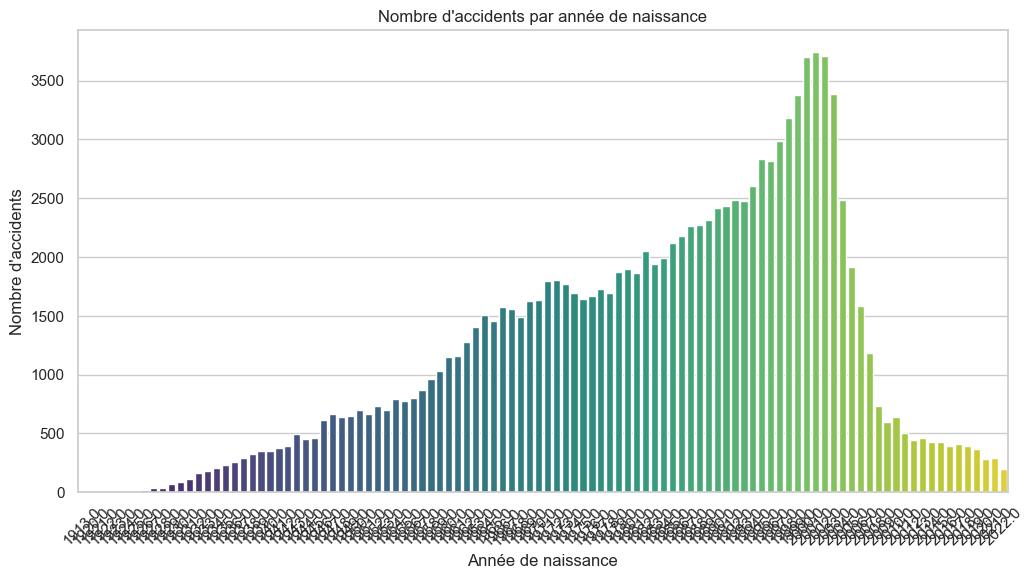

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import year, col

df_ann_acc_pandas = df_ann_acc.toPandas()

# Configurer les paramètres de style pour seaborn
sns.set(style="whitegrid")

# Créer un graphique à barres
plt.figure(figsize=(12, 6))
sns.barplot(x='an_nais', y='count', data=df_ann_acc_pandas, palette='viridis')

# Ajouter des titres et des labels
plt.title('Nombre d\'accidents par année de naissance')
plt.xlabel('Année de naissance')
plt.ylabel('Nombre d\'accidents')

# Afficher le graphique
plt.xticks(rotation=45)
plt.show()

   place  count
0     -1      8
1      1  94292
2      2  14001
3      3   2459
4      4   2232


C:\Users\badre\AppData\Local\Temp\ipykernel_7740\4125543816.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='place', y='count', data=df_accidents_by_location, palette='viridis')


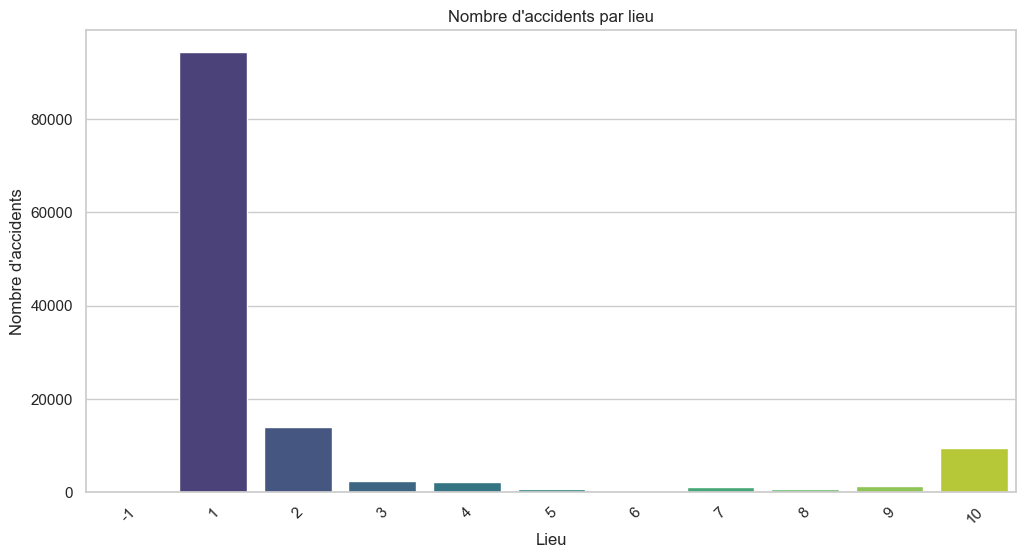

In [23]:
# Grouper par 'place' et compter le nombre d'accidents
df_accidents_by_location = df.groupby('place').size().reset_index(name='count')

# Afficher les premières lignes pour vérifier les données
print(df_accidents_by_location.head())

# Créer un graphique à barres pour représenter le nombre d'accidents par lieu
plt.figure(figsize=(12, 6))
sns.barplot(x='place', y='count', data=df_accidents_by_location, palette='viridis')

# Ajouter des titres et des labels
plt.title('Nombre d\'accidents par lieu')
plt.xlabel('Lieu')
plt.ylabel('Nombre d\'accidents')

# Afficher le graphique
plt.xticks(rotation=45)
plt.show()